<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab5_1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Завантаження датасету "Ірис"
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Перші 5 рядків датасету:")
print(iris_df.head())

Перші 5 рядків датасету:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Масштабування даних
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)


In [4]:
# Метод ліктя для визначення оптимальної кількості кластерів
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(iris_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


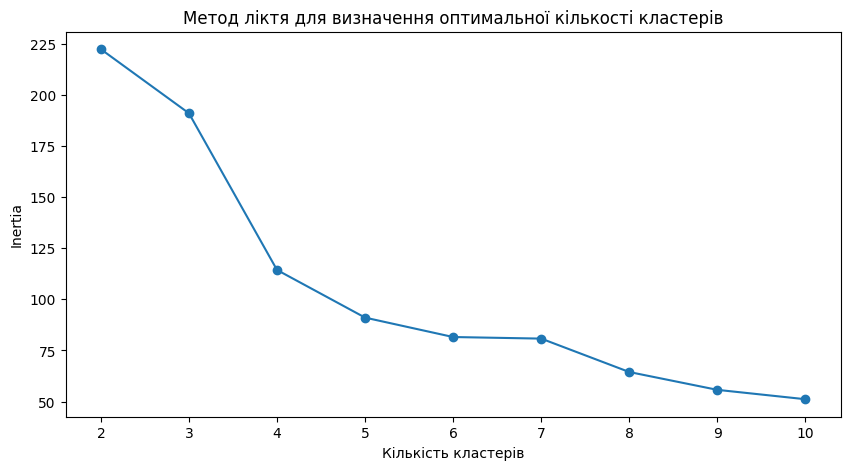

In [5]:
# Візуалізація методу ліктя
plt.figure(figsize=(10,5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

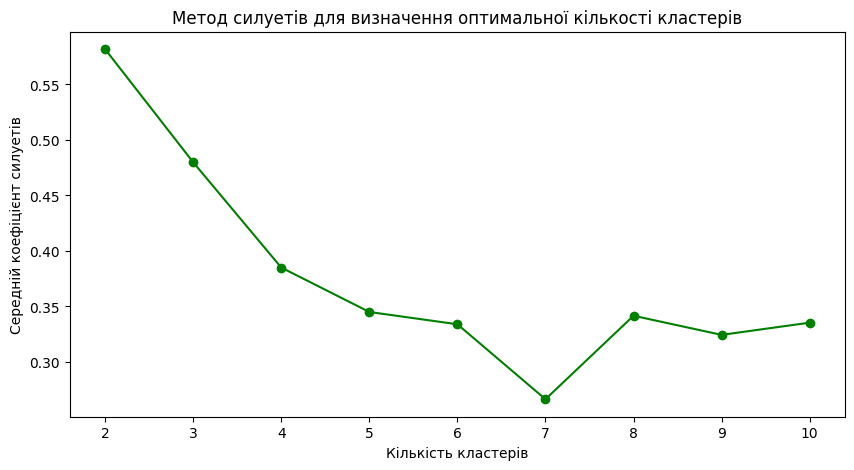

In [6]:
# Візуалізація методу силуетів
plt.figure(figsize=(10,5))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуетів')
plt.show()

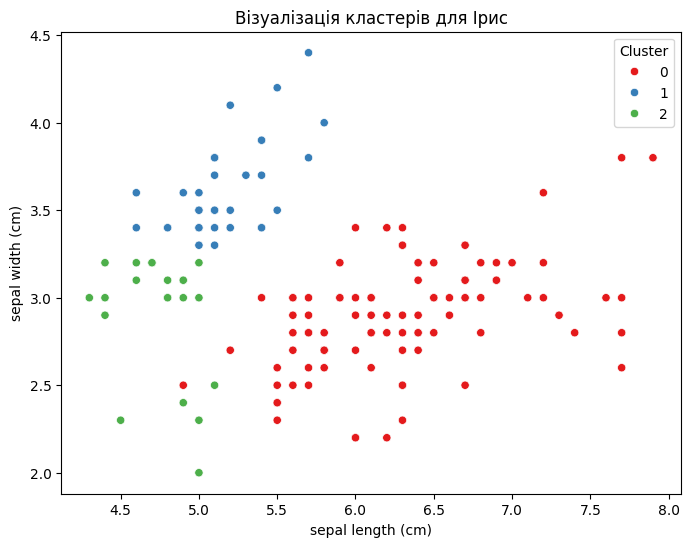

In [9]:
# Візуалізація кластерів для оптимальної кількості
optimal_clusters = 3  # визначено за допомогою методу ліктя і силуетів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df, x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', palette='Set1')
plt.title('Візуалізація кластерів для Ірис')
plt.show()

Висновки
Оптимальною кількістю кластерів для датасету Ірис є 3, що підтверджується як методом ліктя, так і методом силуетів. Графік ліктя показує значний злам на 3 кластерах, після чого інерція зменшується не так різко. Метод силуетів також демонструє найвищий коефіцієнт на 3 кластерах, вказуючи на чітку структуру кластеризації. Візуалізація підтверджує, що три кластери адекватно розділяють дані, хоча деякі кластери частково перекриваються.